# [Pytorch DL MODEL 실습]

- 데이터셋 : iris.csv
- 학습방법 : 지도학습 + 분류 => 다중분류


[1] 모듈 로딩  및 데이터  준비 <hr>

In [1]:
# 모듈로딩
import pandas as pd												# 데이터 관련 모듈
import numpy as np			
import torch					
import torch.nn as nn											# 인공신경망 관련 모듈
import torch.nn.functional as F									# 인공신경망 관련 함수
import torch.optim as optim										# 최적화 모듈
from sklearn.model_selection import train_test_split			# 학습용 데이터

In [2]:
DATA_FAIL = '../Data/iris.csv'

[2] 데이터 로딩 및 확인 <hr>

In [3]:
## 데이터 로딩
irisDF = pd.read_csv(DATA_FAIL, engine='python')

irisDF


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
# 데이터 확인
irisDF.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [5]:
irisDF.variety =irisDF.variety.replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})

C:\Users\KDT17\AppData\Local\Temp\ipykernel_24156\3821954281.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  irisDF.variety =irisDF.variety.replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})


In [6]:
irisDF.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety           int64
dtype: object

# [3] 데이터셋 준비

In [7]:
featureDf = irisDF[irisDF.columns[:-1]]
targetDf = irisDF[irisDF.columns[-1]]

print(f'[feature] : {featureDf.shape} , {featureDf.ndim}D')
print(f'[target] : {targetDf.shape} , {targetDf.ndim}D')

[feature] : (150, 4) , 2D
[target] : (150,) , 1D


In [8]:

X_train, X_test, y_train, y_test = train_test_split(featureDf,targetDf,
													test_size=0.2,
													stratify=targetDf,
													random_state=42)

print(f' X_train {X_train.shape} , x_train {X_train.ndim}D')
print(f' y_train {y_train.shape} , y_train {y_train.ndim}D')
print(f' y_test {y_test.shape} , y_test {y_test.ndim}D')
print(f' x test {X_test.shape} , xest{X_test.ndim}D')


 X_train (120, 4) , x_train 2D
 y_train (120,) , y_train 1D
 y_test (30,) , y_test 1D
 x test (30, 4) , xest2D


# [4] 모델 설계 및 클래스 구현

In [9]:
# # ----------------------------------------------------------------------------------
# # 클래스  이름 :Iris_Model
# # 부모 클래스 : nn.model()
# # 모델층 구성			입력신호수			출력신호수	활성화 함수
# # - 입력층:		피쳐 	4				3000개		ReLu	
# # - 은닉층 1층:  			3000개			20개		ReLu	
# # - 은닉층 2층:			1500개			10개		ReLu
# # - 은닉층 3층:			1000개			10개		ReLu
# # - 은닉층 4층: 			500개			 5개		ReLu
# # - 은닉층 5층: 			500개			 5개		ReLu
# # - 은닉층 6층: 			500개			 5개		ReLu
# # - 은닉층 7층: 			500개			 5개		ReLu
# # - 은닉층 8층: 			500개			 5개		ReLu
# # - 출력층:				 5개			 3개		Softmax => 손실함수 내 포함
# # -----------------------------------------------------------------------------------




class Iris_Model(nn.Module):

	# 인스턴스 초기화
	def __init__(self):
		super().__init__()
		print('__init__()')
		self.in_layer = nn.Linear(4,3000)
		self.hd_layer1 = nn.Linear(3000,2000)
		self.hd_layer2 = nn.Linear(2000,1500)
		self.hd_layer3 = nn.Linear(1500,1000)
		self.hd_layer4 = nn.Linear(1000,500)
		self.hd_layer5 = nn.Linear(500,150)
		self.hd_layer6 = nn.Linear(150,100)
		self.hd_layer7 = nn.Linear(100,50)
		self.hd_layer8 = nn.Linear(50,25)
		self.hd_layer9 = nn.Linear(25,10)
		self.hd_layer10 = nn.Linear(10,5)
		self.out_layer = nn.Linear(5,3)

	# 학습 즉, 순방향 진행 메서드 forward:필수 오버라이딩 메서드
	# 매개변수 data : 학습용 데이터 전달
	def forward(self,data):
		
		#입력 -> 입력층
		out = self.in_layer(data)			#출력 
		out = F.relu(out)
		

		#은닉층1
		out = self.hd_layer1(out)			#1. 
		out = F.relu(out)
		out = self.hd_layer2(out)			#1. 
		out = F.relu(out)
		out = self.hd_layer3(out)			#1. 
		out = F.relu(out)
		out = self.hd_layer4(out)			#1. 
		out = F.relu(out)
		out = self.hd_layer5(out)			#1. 
		out = F.relu(out)
		out = self.hd_layer6(out)			#1. 
		out = F.relu(out)
		out = self.hd_layer7(out)			#1. 
		out = F.relu(out)
		out = self.hd_layer8(out)			#1. 
		out = F.relu(out)
		out = self.hd_layer9(out)			#1. 
		out = F.relu(out)
		out = self.hd_layer10(out)			#1. 
		out = F.relu(out)

		# 출력층
		out = self.out_layer(out)			#1. 
		
		return out

		

In [10]:
# 모델 구조 확인
iris_model = Iris_Model()
print(iris_model)

# shape 체크
data = torch.FloatTensor([[1.,3.2,1.9,2.5]])


__init__()
Iris_Model(
  (in_layer): Linear(in_features=4, out_features=3000, bias=True)
  (hd_layer1): Linear(in_features=3000, out_features=2000, bias=True)
  (hd_layer2): Linear(in_features=2000, out_features=1500, bias=True)
  (hd_layer3): Linear(in_features=1500, out_features=1000, bias=True)
  (hd_layer4): Linear(in_features=1000, out_features=500, bias=True)
  (hd_layer5): Linear(in_features=500, out_features=150, bias=True)
  (hd_layer6): Linear(in_features=150, out_features=100, bias=True)
  (hd_layer7): Linear(in_features=100, out_features=50, bias=True)
  (hd_layer8): Linear(in_features=50, out_features=25, bias=True)
  (hd_layer9): Linear(in_features=25, out_features=10, bias=True)
  (hd_layer10): Linear(in_features=10, out_features=5, bias=True)
  (out_layer): Linear(in_features=5, out_features=3, bias=True)
)


# 학습 준비 <hr>

In [11]:
# [5-1] 학습 관련 설정들
EPOCHS = 10											# 학습용 데이터셋 DS를 처음 부터 끝까지 1번학습 하는것을 에포크 
BATCH_SIZE = 40											# DS을 학습량 만큼 나눈 사이즈
ITERATION = int(X_train.shape[0]/BATCH_SIZE)			# 학습용 DS이 분리된 수 => 1 포크에  W, B 업데이트 횟수 


# 학습, 데이터셋 로딩 등  GPU에서 실행여부 설정
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu' 

print(f'Device : {DEVICE}, EPOCHS : {EPOCHS}, Batch_size : {BATCH_SIZE}, {ITERATION}')

Device : cpu, EPOCHS : 10, Batch_size : 40, 3


In [12]:
# 학습 관련 인스턴스들
LR = 0.01 
MODEL = Iris_Model()								# 학습 모델
OPTIMIZER = optim.Adam(MODEL.parameters(), lr=LR) 			# 최적화 즉, 경사하강법, 알고리즘으로 
LOSS_FN = nn.CrossEntropyLoss()								# 손실계산 알고리즘

__init__()


In [13]:
# # 학습함수 =====================================================

# def training():
# 	# 학습 모드 설정
# 	iris_model.train()

# 	# 에포크 : DS 처음부터 ~ 끝까지 학습
# 	for epoch in range(EPOCHS):

# 		E_LOSS = 0

# 		for i in range(ITERATION):
# 			start = i*BATCH_SIZE
# 			end = start + BATCH_SIZE
# 			# ndarray => tensor 변환

# 			X = torch.FloatTensor(X_train.values[start:end])
# 			y = torch.FloatTensor(y_train.values[start:end])

# 			# 가중치 기울기 0 초기화
# 			OPTIMIZER.zero_grad()


# 			# 학습진행

# 			pre_y = MODEL(X)

# 			# 손실계산

# 			loss = LOSS_FN(pre_y, y.reshape(-1,1))

# 			# 역전파 진행

# 			loss.backward()

# 			# 가중치/절편 업데이트
# 			OPTIMIZER.step()

# 			E_LOSS += loss.item()


# 		print(f'{epoch} LOSS : {loss/ITERATION}')

# 	return loss

In [14]:
# 검증 함수 ---------------------------------
# 검증용 데이터셋 으로 모델 검증
# 학습 지속 여부 결정 기준이 됨
# -------------------------------------------------

def evaluate():
	# 에포크 단위로 검증 ==> 검증모드
	iris_model.eval()

	# W, b 가 엡데이트 해제
	with torch.no_grad():
		# 검증용 데이터셋 => 텐서화
		# ndarray ==> tensor 변환
		X = torch.FloatTensor(X_test.values)
		y = torch.FloatTensor(y_test.values)

		# 검증진행
		pre_y = iris_model(X)

		# 손실계산
		loss = LOSS_FN(pre_y, y.reshape(-1).long())
	return loss.item()

In [15]:
evaluate()

1.1426037549972534

In [16]:
# 
def training():
	# 학습 모드 설정
	iris_model.train()

	# 에포크 : DS 처음부터 ~ 끝까지 학습
	

	E_LOSS = 0

	for i in range(ITERATION):
		start = i*BATCH_SIZE
		end = start + BATCH_SIZE
		# ndarray => tensor 변환

		X = torch.FloatTensor(X_train.values[start:end])
		y = torch.FloatTensor(y_train.values[start:end])

		# 가중치 기울기 0 초기화
		OPTIMIZER.zero_grad()


		# 학습진행

		pre_y = MODEL(X)

		# 손실계산

		loss = LOSS_FN(pre_y, y.reshape(-1).long())

		# 역전파 진행

		loss.backward()

		# 가중치/절편 업데이트
		OPTIMIZER.step()

		E_LOSS += loss.item()


 

	return loss.item()

In [17]:
# 에포크 : DS 처음부터 ~ 끝까지 학습
LOSS_HIST = {'Train':[], 'Valid':[]}

# 에포크 단위 학습/검증 진행

for epoch in range(EPOCHS):
	trainloss = training()
	validloss = evaluate()


	LOSS_HIST['Train'].append(trainloss)
	LOSS_HIST['Valid'].append(validloss)

	print(f'\n EPOCH[ {epoch}/{EPOCHS}]')
	print(f'TRAIN_LOSS{trainloss:.5f}')
	print(f'VALID_LOSS{validloss:.5f}')


 EPOCH[ 0/10]
TRAIN_LOSS1.30054
VALID_LOSS1.14260

 EPOCH[ 1/10]
TRAIN_LOSS1.12404
VALID_LOSS1.14260

 EPOCH[ 2/10]
TRAIN_LOSS1.09211
VALID_LOSS1.14260

 EPOCH[ 3/10]
TRAIN_LOSS1.12068
VALID_LOSS1.14260

 EPOCH[ 4/10]
TRAIN_LOSS1.11605
VALID_LOSS1.14260

 EPOCH[ 5/10]
TRAIN_LOSS1.07311
VALID_LOSS1.14260

 EPOCH[ 6/10]
TRAIN_LOSS1.06784
VALID_LOSS1.14260

 EPOCH[ 7/10]
TRAIN_LOSS1.11973
VALID_LOSS1.14260

 EPOCH[ 8/10]
TRAIN_LOSS0.99056
VALID_LOSS1.14260

 EPOCH[ 9/10]
TRAIN_LOSS0.93736
VALID_LOSS1.14260


In [18]:
LOSS_HIST['Train']

[1.3005449771881104,
 1.1240379810333252,
 1.0921106338500977,
 1.120680570602417,
 1.1160510778427124,
 1.0731055736541748,
 1.0678375959396362,
 1.119732141494751,
 0.990559458732605,
 0.9373598098754883]

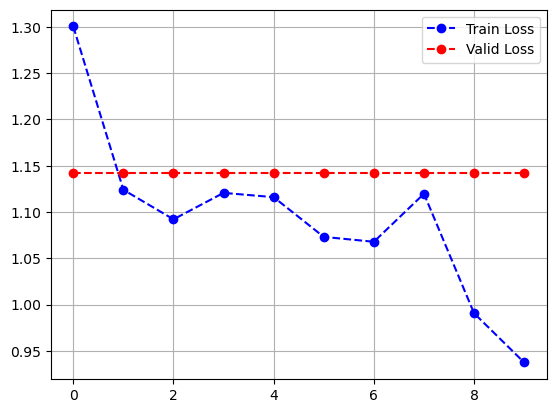

In [19]:
import matplotlib.pyplot as plt

plt.plot(LOSS_HIST['Train'],'bo--', label='Train Loss')
plt.plot(LOSS_HIST['Valid'],'ro--', label='Valid Loss')
plt.grid()
plt.legend()
plt.show()